[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/MSML_602/blob/main/Project/checkpoint2.ipynb)

This notebook runs CleanVision on [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

In [1]:
!pip install -U pip
!pip install "cleanvision[huggingface]"

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.3 MB/s eta 0:00:00


**After you install these packages, you may need to restart your notebook runtime before running the rest of this notebook.**

In [2]:
import pandas as pd
from datasets import load_dataset, concatenate_datasets


from cleanvision import Imagelab

### Download dataset from Huggingface and save as png files

In [ ]:
from datasets import load_dataset

ds =

In [9]:
dataset_dict = load_dataset("zalando-datasets/fashion_mnist") #load_dataset("cifar10")
dataset = concatenate_datasets([dataset_dict[split] for split in dataset_dict.keys()])

README.md:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/30.9M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/5.18M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [10]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 70000
})

### Run CleanVision

In [12]:
imagelab = Imagelab(hf_dataset=dataset, image_key="image")

In [13]:
imagelab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/70000 [00:00<?, ?it/s]

  0%|          | 0/70000 [00:00<?, ?it/s]

Issue checks completed. 81725 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


### Report all the issues found in the dataset

Removing grayscale from potential issues in the dataset as it exceeds max_prevalence=0.5 
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  1 | low_information  |        10775 |
|  2 | near_duplicates  |          927 |
|  3 | dark             |           23 |
|  4 | light            |            0 |
|  5 | odd_aspect_ratio |            0 |
|  6 | blurry           |            0 |
|  7 | odd_size         |            0 |
|  8 | exact_duplicates |            0 | 

------------------ low_information images ------------------

Number of examples with this issue: 10775
Examples representing most severe instances of this issue:



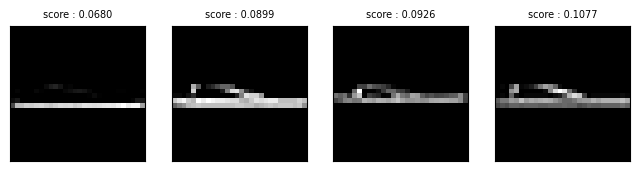

------------------ near_duplicates images ------------------

Number of examples with this issue: 927
Examples representing most severe instances of this issue:

Set: 0


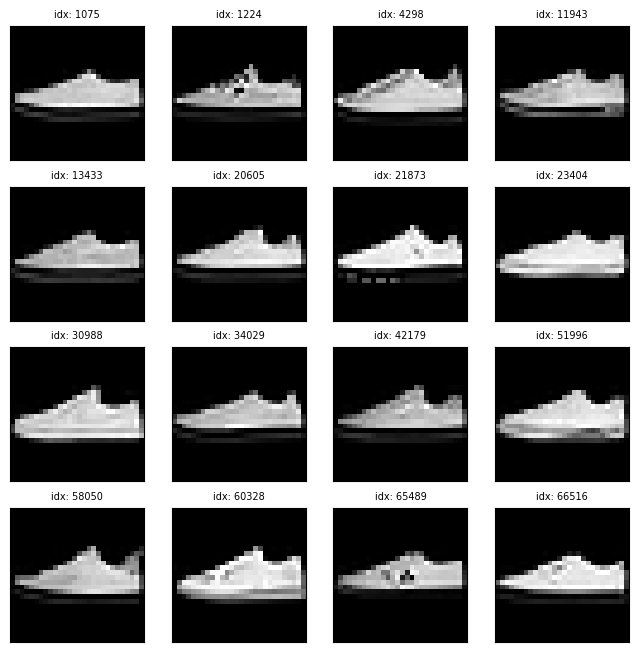

Set: 1


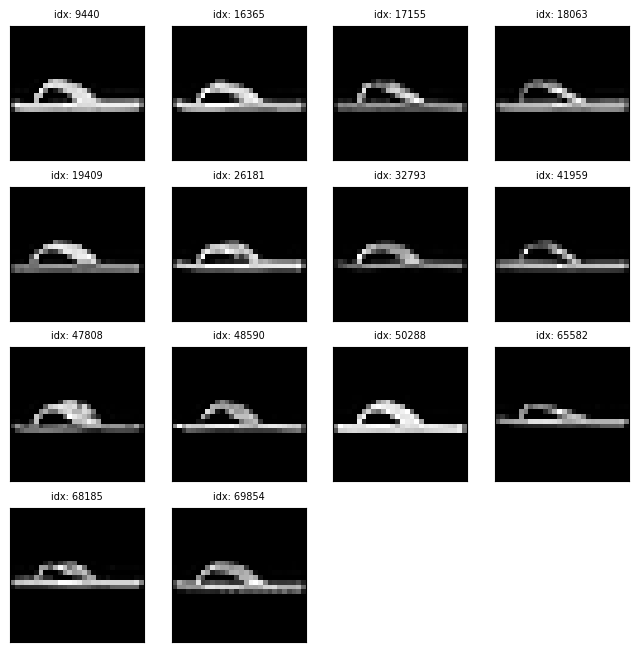

Set: 2


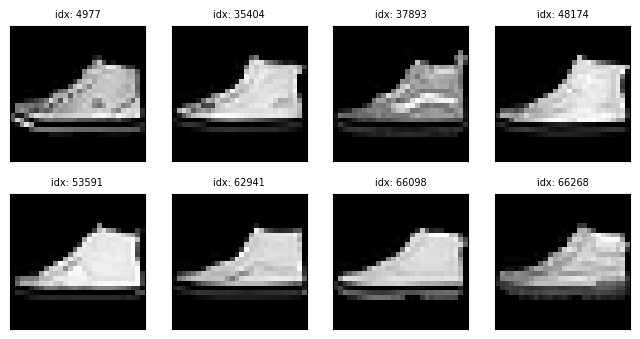

Set: 3


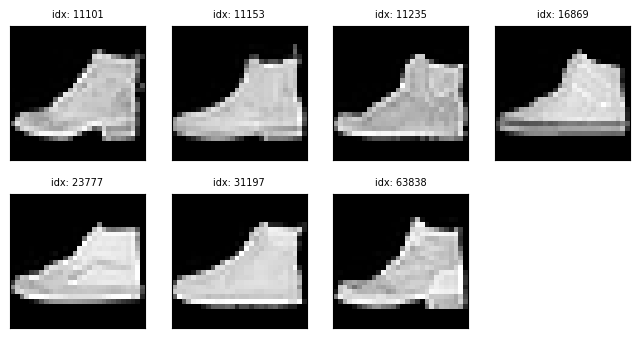

----------------------- dark images ------------------------

Number of examples with this issue: 23
Examples representing most severe instances of this issue:



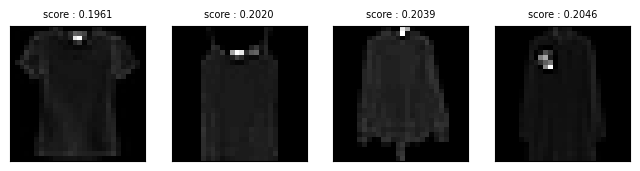

In [14]:
imagelab.report()

View more information about each image, such as what types of issues it exhibits and its quality score with respect to each type of issue.

In [15]:
imagelab.issues

,odd_size_score,is_odd_size_issue,odd_aspect_ratio_score,is_odd_aspect_ratio_issue,low_information_score,is_low_information_issue,light_score,is_light_issue,grayscale_score,is_grayscale_issue,dark_score,is_dark_issue,blurry_score,is_blurry_issue,exact_duplicates_score,is_exact_duplicates_issue,near_duplicates_score,is_near_duplicates_issue
0,1.0,False,1.0,False,0.471182,False,1.0,False,0,True,0.964706,False,0.782126,False,1.0,False,1.0,False
1,1.0,False,1.0,False,0.488036,False,1.0,False,0,True,0.992824,False,0.609102,False,1.0,False,1.0,False
2,1.0,False,1.0,False,0.307095,False,1.0,False,0,True,0.835373,False,0.759629,False,1.0,False,1.0,False
3,1.0,False,1.0,False,0.412742,False,1.0,False,0,True,0.762118,False,0.793485,False,1.0,False,1.0,False
4,1.0,False,1.0,False,0.326907,False,1.0,False,0,True,1.000000,False,0.830525,False,1.0,False,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1.0,False,1.0,False,0.418425,False,1.0,False,0,True,0.926824,False,0.814066,False,1.0,False,1.0,False
69996,1.0,False,1.0,False,0.303247,False,1.0,False,0,True,0.883098,False,0.847557,False,1.0,False,1.0,False
69997,1.0,False,1.0,False,0.326369,False,1.0,False,0,True,0.933333,False,0.799788,False,1.0,False,1.0,False
69998,1.0,False,1.0,False,0.252194,True,1.0,False,0,True,0.941843,False,0.875057,False,1.0,False,1.0,False


View global information about each issue, such as how many images in the dataset suffer from this issue.

In [16]:
imagelab.issue_summary

,issue_type,num_images
0,grayscale,70000
1,low_information,10775
2,near_duplicates,927
3,dark,23
4,light,0
5,odd_aspect_ratio,0
6,blurry,0
7,odd_size,0
8,exact_duplicates,0


View number of sets of near duplicate images

In [17]:
imagelab.info["near_duplicates"]["num_sets"]

396

Visualize 20 sets of near duplicate images

Set: 0


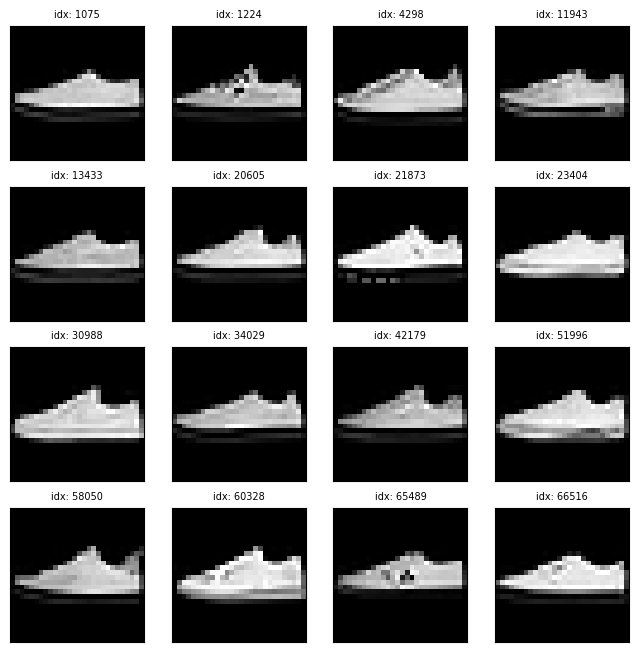

Set: 1


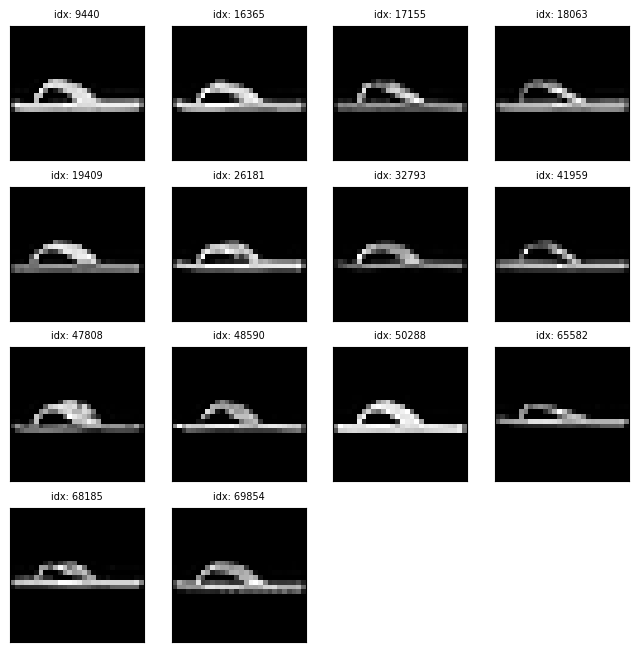

Set: 2


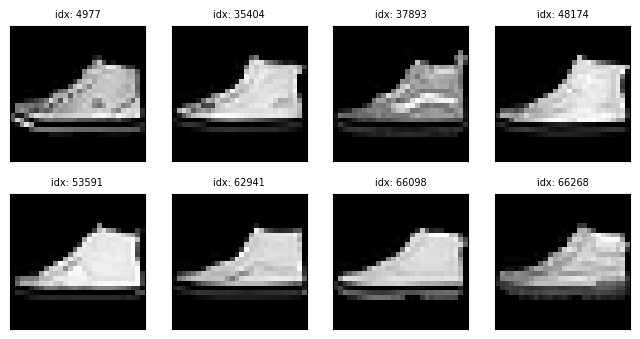

Set: 3


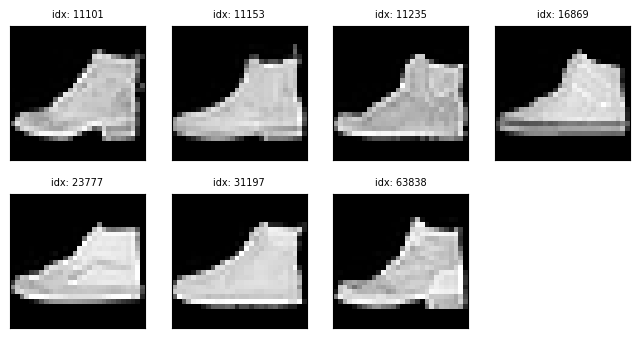

Set: 4


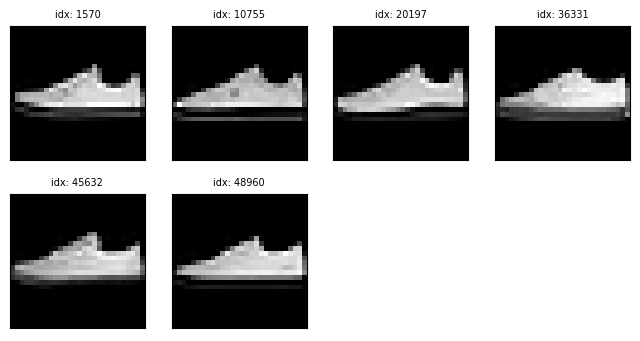

Set: 5


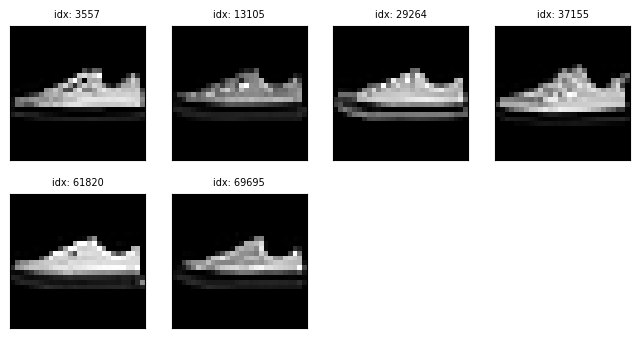

Set: 6


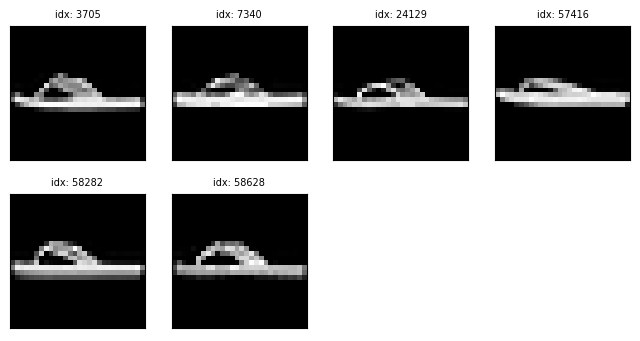

Set: 7


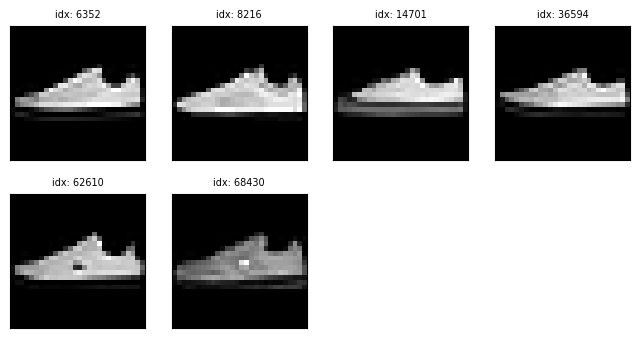

Set: 8


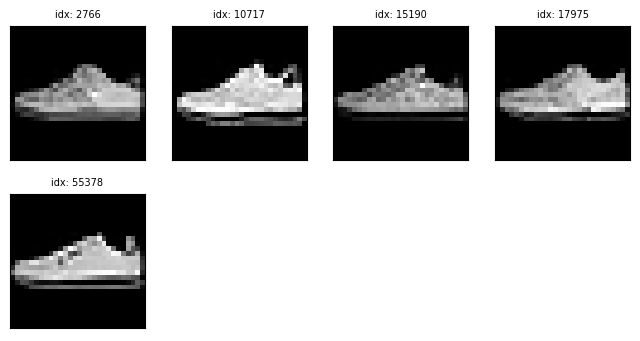

Set: 9


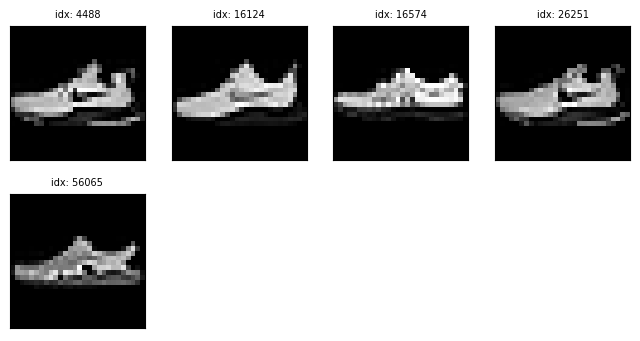

Set: 10


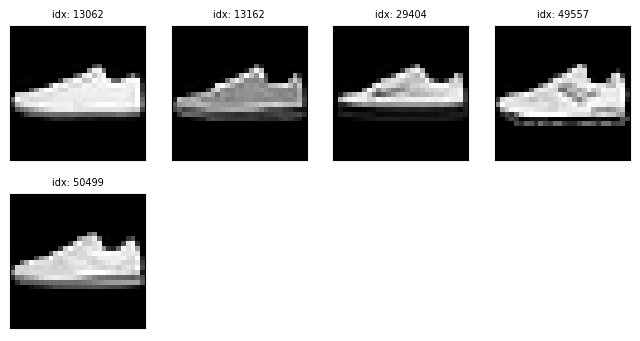

Set: 11


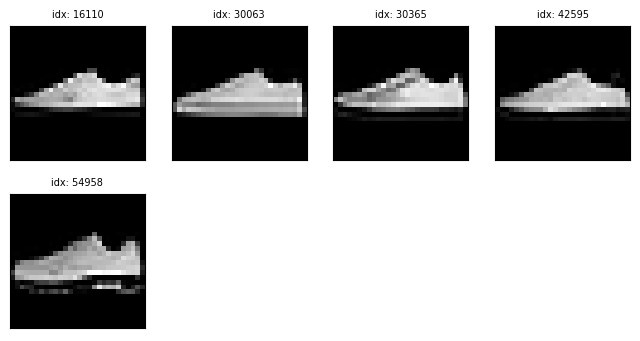

Set: 12


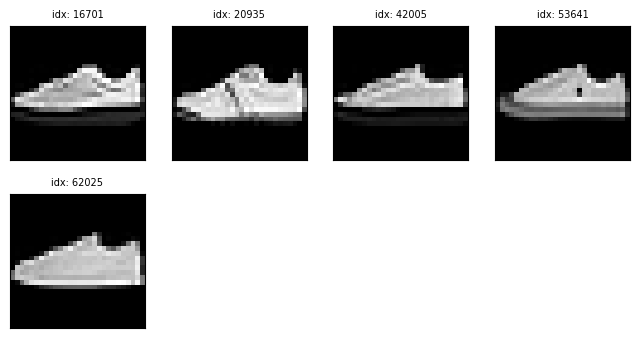

Set: 13


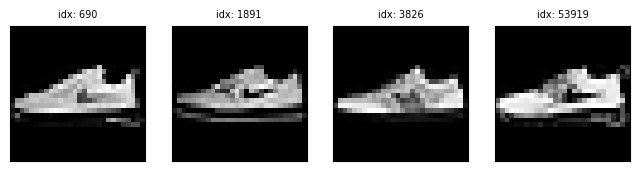

Set: 14


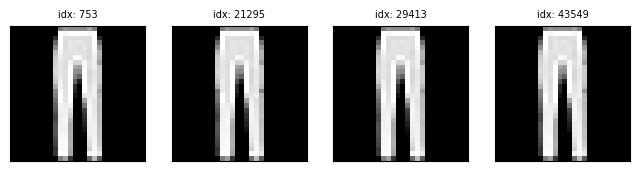

Set: 15


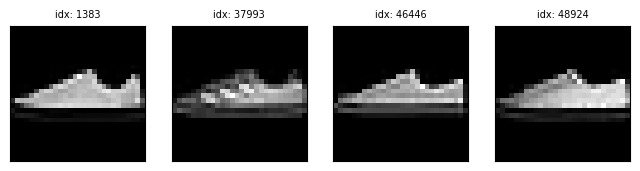

Set: 16


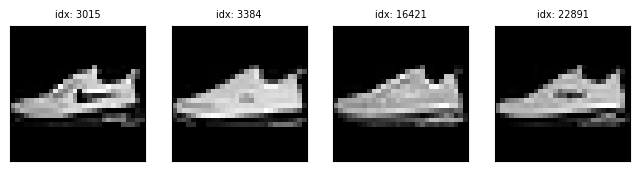

Set: 17


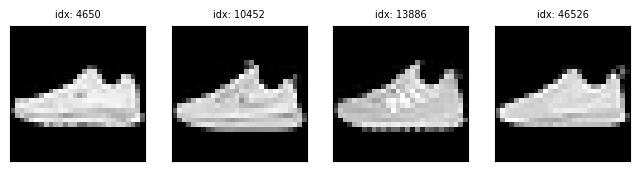

Set: 18


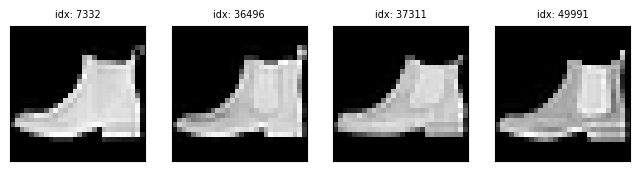

Set: 19


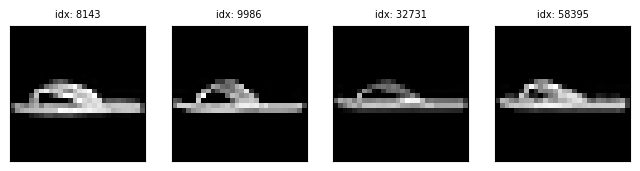

In [18]:
imagelab.visualize(issue_types=["near_duplicates"], num_images=20)